In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy
from matplotlib.animation import FFMpegWriter
from matplotlib.patches import Circle
# !apt update -y
# !apt install ffmpeg -y
import matplotlib.pyplot as plt
from matplotlib.animation import FFMpegWriter

In [2]:
# Pendulum Parameters:
m_1 = 1  # kg
m_2 = 1  # kg
m_3 = 1  # kg
m_4 = 1  # kg

l_1 = 1  # m
l_2 = 1  # m
l_3 = 1  # m
l_4 = 1  # m

g = 9.8  # m/s^2
tau1 = 10

# Create Symbols for Time:
t = sympy.Symbol('t')  # Creates symbolic variable t
tau1 = sympy.Symbol('tau1')
tau2 = sympy.Symbol('tau2')
tau3 = sympy.Symbol('tau3')
tau4 = sympy.Symbol('tau4')

# Create Generalized Coordinates as a function of time: q = [theta_1, theta_2, theta_3]
th1 = sympy.Function('th1')(t)
th2 = sympy.Function('th2')(t)
th3 = sympy.Function('th3')(t)
th4 = sympy.Function('th4')(t)

# Position Equation: r = [x, y]
r1 = np.array([l_1 * sympy.sin(th1), -l_1 * sympy.cos(th1)])  # Position of first pendulum
r2 = np.array([l_2 * sympy.sin(th2) + r1[0], -l_2 * sympy.cos(th2) + r1[1]])  # Position of second pendulum
r3 = np.array([l_3 * sympy.sin(th3) + r2[0], -l_3 * sympy.cos(th3) + r2[1]])  # Position of third pendulum
r4 = np.array([l_4 * sympy.sin(th4) + r3[0], -l_4 * sympy.cos(th4) + r3[1]])  # Position of third pendulum


# Velocity Equation: d/dt(r) = [dx/dt, dy/dt]
v1 = np.array([r1[0].diff(t), r1[1].diff(t)])  # Velocity of first pendulum
v2 = np.array([r2[0].diff(t), r2[1].diff(t)])  # Velocity of second pendulum
v3 = np.array([r3[0].diff(t), r3[1].diff(t)])  # Velocity of third pendulum
v4 = np.array([r4[0].diff(t), r4[1].diff(t)])  # Velocity of third pendulum


# Energy Equations:
T = (1/2 * m_1 * np.dot(v1, v1)) + (1/2 * m_2 * np.dot(v2, v2)) + (1/2 * m_3 * np.dot(v3, v3)) + (1/2 * m_4 * np.dot(v4, v4))  # Kinetic Energy
V = m_1 * g * r1[1] + m_2 * g * r2[1] + m_3 * g * r3[1] + m_4 * g * r4[1] # Potential Energy
L = T - V  # Lagrangian

# Lagrange Terms:
dL_dth1 = L.diff(th1)
dL_dth1_dt = L.diff(th1.diff(t)).diff(t)
dL_dth2 = L.diff(th2)
dL_dth2_dt = L.diff(th2.diff(t)).diff(t)
dL_dth3 = L.diff(th3)
dL_dth3_dt = L.diff(th3.diff(t)).diff(t)

dL_dth4 = L.diff(th4)
dL_dth4_dt = L.diff(th4.diff(t)).diff(t)

# Euler-Lagrange Equations: dL/dq - d/dt(dL/ddq) = 0
th1_eqn = dL_dth1 - dL_dth1_dt
th2_eqn = dL_dth2 - dL_dth2_dt
th3_eqn = dL_dth3 - dL_dth3_dt
th4_eqn = dL_dth4 - dL_dth4_dt

# Euler-Lagrange Equations: dL/dq - d/dt(dL/ddq) = 0
#th1_eqn = dL_dth1 - dL_dth1_dt - tau1
#th2_eqn = dL_dth2 - dL_dth2_dt - tau2
#th3_eqn = dL_dth3 - dL_dth3_dt - tau3


# Replace Time Derivatives and Functions with Symbolic Variables:
replacements = [(th1.diff(t).diff(t), sympy.Symbol('ddth1')), (th1.diff(t), sympy.Symbol('dth1')), (th1, sympy.Symbol('th1')),
                (th2.diff(t).diff(t), sympy.Symbol('ddth2')), (th2.diff(t), sympy.Symbol('dth2')), (th2, sympy.Symbol('th2')),
                (th3.diff(t).diff(t), sympy.Symbol('ddth3')), (th3.diff(t), sympy.Symbol('dth3')), (th3, sympy.Symbol('th3')),
                (th4.diff(t).diff(t), sympy.Symbol('ddth4')), (th4.diff(t), sympy.Symbol('dth4')), (th4, sympy.Symbol('th4'))]

th1_eqn = th1_eqn.subs(replacements)
th2_eqn = th2_eqn.subs(replacements)
th3_eqn = th3_eqn.subs(replacements)
th4_eqn = th4_eqn.subs(replacements)

r1 = r1[0].subs(replacements), r1[1].subs(replacements)
r2 = r2[0].subs(replacements), r2[1].subs(replacements)
r3 = r3[0].subs(replacements), r3[1].subs(replacements)
r4 = r4[0].subs(replacements), r4[1].subs(replacements)

# Simplfiy then Force SymPy to Cancel factorization: [Sometimes needed to use .coeff()]
# Set eqn equal to the control torques tau
th1_eqn = sympy.simplify(th1_eqn)
th2_eqn = sympy.simplify(th2_eqn)
th3_eqn = sympy.simplify(th3_eqn)
th4_eqn = sympy.simplify(th4_eqn)

th1_eqn = th1_eqn.cancel()
th2_eqn = th2_eqn.cancel()
th3_eqn = th3_eqn.cancel()
th4_eqn = th4_eqn.cancel()

# Solve for Coefficients for A * x = B where x = [ddth1 ddth2 ddth3]
A1 = th1_eqn.coeff(sympy.Symbol('ddth1'))
A2 = th1_eqn.coeff(sympy.Symbol('ddth2'))
A3 = th1_eqn.coeff(sympy.Symbol('ddth3'))
A3_0 = th1_eqn.coeff(sympy.Symbol('ddth4'))

A4 = th2_eqn.coeff(sympy.Symbol('ddth1'))
A5 = th2_eqn.coeff(sympy.Symbol('ddth2'))
A6 = th2_eqn.coeff(sympy.Symbol('ddth3'))
A6_0 = th2_eqn.coeff(sympy.Symbol('ddth4'))

A7 = th3_eqn.coeff(sympy.Symbol('ddth1'))
A8 = th3_eqn.coeff(sympy.Symbol('ddth2'))
A9 = th3_eqn.coeff(sympy.Symbol('ddth3'))
A9_0 = th3_eqn.coeff(sympy.Symbol('ddth4'))

A10 = th4_eqn.coeff(sympy.Symbol('ddth1'))
A11 = th4_eqn.coeff(sympy.Symbol('ddth2'))
A12 = th4_eqn.coeff(sympy.Symbol('ddth3'))
A13 = th4_eqn.coeff(sympy.Symbol('ddth4'))



# Multiply remaining terms by -1 to switch to other side of equation: A * x - B = 0 -> A * x = B
remainder = [(sympy.Symbol('ddth1'), 0), (sympy.Symbol('ddth2'), 0), (sympy.Symbol('ddth3'), 0), (sympy.Symbol('ddth4'), 0)]
B1 = -1 * th1_eqn.subs(remainder)
B2 = -1 * th2_eqn.subs(remainder)
B3 = -1 * th3_eqn.subs(remainder)
B4 = -1 * th4_eqn.subs(remainder)

# Generate Lambda Functions for A and B and Position Equations:
replacements = (sympy.Symbol('th1'), sympy.Symbol('dth1'), sympy.Symbol('th2'), sympy.Symbol('dth2'), sympy.Symbol('th3'), sympy.Symbol('dth3'), sympy.Symbol('th4'), sympy.Symbol('dth4'))
A1 = sympy.utilities.lambdify(replacements, A1, "numpy")
A2 = sympy.utilities.lambdify(replacements, A2, "numpy")
A3 = sympy.utilities.lambdify(replacements, A3, "numpy")
A3_0 = sympy.utilities.lambdify(replacements, A3_0, "numpy")

A4 = sympy.utilities.lambdify(replacements, A4, "numpy")
A5 = sympy.utilities.lambdify(replacements, A5, "numpy")
A6 = sympy.utilities.lambdify(replacements, A6, "numpy")
A6_0 = sympy.utilities.lambdify(replacements, A6_0, "numpy")

A7 = sympy.utilities.lambdify(replacements, A7, "numpy")
A8 = sympy.utilities.lambdify(replacements, A8, "numpy")
A9 = sympy.utilities.lambdify(replacements, A9, "numpy")
A9_0 = sympy.utilities.lambdify(replacements, A9_0, "numpy")

A10 = sympy.utilities.lambdify(replacements, A10, "numpy")
A11 = sympy.utilities.lambdify(replacements, A11, "numpy")
A12 = sympy.utilities.lambdify(replacements, A12, "numpy")
A13 = sympy.utilities.lambdify(replacements, A13, "numpy")

B1 = sympy.utilities.lambdify(replacements, B1, "numpy")
B2 = sympy.utilities.lambdify(replacements, B2, "numpy")
B3 = sympy.utilities.lambdify(replacements, B3, "numpy")
B4 = sympy.utilities.lambdify(replacements, B4, "numpy")

r1 = sympy.utilities.lambdify(replacements, r1, "numpy")
r2 = sympy.utilities.lambdify(replacements, r2, "numpy")
r3 = sympy.utilities.lambdify(replacements, r3, "numpy")
r4 = sympy.utilities.lambdify(replacements, r4, "numpy")

In [8]:
# Simulate System:
x0 = np.pi/2, 0.1, np.pi/2, 1, np.pi/2, 0.1, np.pi/2, 0.1  # th1, dth1, th2, dth2, th3, dth3, th4, dth4
dt = 0.001
sim_time = 10
time = np.arange(0, sim_time, dt)
sim_length = len(time)

# Initialize Arrays:
th1_vec = np.zeros(sim_length)
dth1_vec = np.zeros(sim_length)

th2_vec = np.zeros(sim_length)
dth2_vec = np.zeros(sim_length)

th3_vec = np.zeros(sim_length)
dth3_vec = np.zeros(sim_length)

th4_vec = np.zeros(sim_length)
dth4_vec = np.zeros(sim_length)

x1_vec = np.zeros(sim_length)
y1_vec = np.zeros(sim_length)

x2_vec = np.zeros(sim_length)
y2_vec = np.zeros(sim_length)

x3_vec = np.zeros(sim_length)
y3_vec = np.zeros(sim_length)

x4_vec = np.zeros(sim_length)
y4_vec = np.zeros(sim_length)

# Evaluate Initial Conditions:
th1_vec[0] = x0[0]
dth1_vec[0] = x0[1]

th2_vec[0] = x0[2]
dth2_vec[0] = x0[3]

th3_vec[0] = x0[4]
dth3_vec[0] = x0[5]

th4_vec[0] = x0[6]
dth4_vec[0] = x0[7]

x1_vec[0], y1_vec[0] = r1(x0[0], x0[1], x0[2], x0[3], x0[4], x0[5], x0[6], x0[7])
x2_vec[0], y2_vec[0] = r2(x0[0], x0[1], x0[2], x0[3], x0[4], x0[5], x0[6], x0[7])
x3_vec[0], y3_vec[0] = r3(x0[0], x0[1], x0[2], x0[3], x0[4], x0[5], x0[6], x0[7])
x4_vec[0], y4_vec[0] = r4(x0[0], x0[1], x0[2], x0[3], x0[4], x0[5], x0[6], x0[7])

# Initialize A and B:
A = np.array([[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0]])
B = np.array([0, 0, 0, 0])

# Euler Integration:
for i in range(1, sim_length):
    # Evaluate Dynamics:
    A[0, 0] = A1(th1_vec[i-1], dth1_vec[i-1], th2_vec[i-1], dth2_vec[i-1], th3_vec[i-1], dth3_vec[i-1], th4_vec[i-1], dth4_vec[i-1])
    A[0, 1] = A2(th1_vec[i-1], dth1_vec[i-1], th2_vec[i-1], dth2_vec[i-1], th3_vec[i-1], dth3_vec[i-1], th4_vec[i-1], dth4_vec[i-1])
    A[0, 2] = A3(th1_vec[i-1], dth1_vec[i-1], th2_vec[i-1], dth2_vec[i-1], th3_vec[i-1], dth3_vec[i-1], th4_vec[i-1], dth4_vec[i-1])
    A[0, 3] = A3_0(th1_vec[i-1], dth1_vec[i-1], th2_vec[i-1], dth2_vec[i-1], th3_vec[i-1], dth3_vec[i-1], th4_vec[i-1], dth4_vec[i-1])
    
    A[1, 0] = A4(th1_vec[i-1], dth1_vec[i-1], th2_vec[i-1], dth2_vec[i-1], th3_vec[i-1], dth3_vec[i-1], th4_vec[i-1], dth4_vec[i-1])
    A[1, 1] = A5(th1_vec[i-1], dth1_vec[i-1], th2_vec[i-1], dth2_vec[i-1], th3_vec[i-1], dth3_vec[i-1], th4_vec[i-1], dth4_vec[i-1])
    A[1, 2] = A6(th1_vec[i-1], dth1_vec[i-1], th2_vec[i-1], dth2_vec[i-1], th3_vec[i-1], dth3_vec[i-1], th4_vec[i-1], dth4_vec[i-1])
    A[1, 3] = A6_0(th1_vec[i-1], dth1_vec[i-1], th2_vec[i-1], dth2_vec[i-1], th3_vec[i-1], dth3_vec[i-1], th4_vec[i-1], dth4_vec[i-1])
    
    A[2, 0] = A7(th1_vec[i-1], dth1_vec[i-1], th2_vec[i-1], dth2_vec[i-1], th3_vec[i-1], dth3_vec[i-1], th4_vec[i-1], dth4_vec[i-1])
    A[2, 1] = A8(th1_vec[i-1], dth1_vec[i-1], th2_vec[i-1], dth2_vec[i-1], th3_vec[i-1], dth3_vec[i-1], th4_vec[i-1], dth4_vec[i-1])
    A[2, 2] = A9(th1_vec[i-1], dth1_vec[i-1], th2_vec[i-1], dth2_vec[i-1], th3_vec[i-1], dth3_vec[i-1], th4_vec[i-1], dth4_vec[i-1])
    A[2, 3] = A9_0(th1_vec[i-1], dth1_vec[i-1], th2_vec[i-1], dth2_vec[i-1], th3_vec[i-1], dth3_vec[i-1], th4_vec[i-1], dth4_vec[i-1])
    
    A[3, 0] = A10(th1_vec[i-1], dth1_vec[i-1], th2_vec[i-1], dth2_vec[i-1], th3_vec[i-1], dth3_vec[i-1], th4_vec[i-1], dth4_vec[i-1])
    A[3, 1] = A11(th1_vec[i-1], dth1_vec[i-1], th2_vec[i-1], dth2_vec[i-1], th3_vec[i-1], dth3_vec[i-1], th4_vec[i-1], dth4_vec[i-1])
    A[3, 2] = A12(th1_vec[i-1], dth1_vec[i-1], th2_vec[i-1], dth2_vec[i-1], th3_vec[i-1], dth3_vec[i-1], th4_vec[i-1], dth4_vec[i-1])
    A[3, 3] = A13(th1_vec[i-1], dth1_vec[i-1], th2_vec[i-1], dth2_vec[i-1], th3_vec[i-1], dth3_vec[i-1], th4_vec[i-1], dth4_vec[i-1])
    
    B[0] = B1(th1_vec[i-1], dth1_vec[i-1], th2_vec[i-1], dth2_vec[i-1], th3_vec[i-1], dth3_vec[i-1], th4_vec[i-1], dth4_vec[i-1])
    B[1] = B2(th1_vec[i-1], dth1_vec[i-1], th2_vec[i-1], dth2_vec[i-1], th3_vec[i-1], dth3_vec[i-1], th4_vec[i-1], dth4_vec[i-1])
    B[2] = B3(th1_vec[i-1], dth1_vec[i-1], th2_vec[i-1], dth2_vec[i-1], th3_vec[i-1], dth3_vec[i-1], th4_vec[i-1], dth4_vec[i-1])
    B[3] = B4(th1_vec[i-1], dth1_vec[i-1], th2_vec[i-1], dth2_vec[i-1], th3_vec[i-1], dth3_vec[i-1], th4_vec[i-1], dth4_vec[i-1])
    
    print(A, B)
    [ddth1, ddth2, ddth3, ddth4] = np.linalg.solve(A, B)

    #states = [th1, dth1, th2, dth2, th3, dth3]
    #odes = [ddth1, ddth2, ddth3]

    # Euler Step Integration:
    th1_vec[i] = th1_vec[i-1] + dth1_vec[i-1] * dt
    dth1_vec[i] = dth1_vec[i-1] + ddth1 * dt

    th2_vec[i] = th2_vec[i-1] + dth2_vec[i-1] * dt
    dth2_vec[i] = dth2_vec[i-1] + ddth2 * dt

    th3_vec[i] = th3_vec[i-1] + dth3_vec[i-1] * dt
    dth3_vec[i] = dth3_vec[i-1] + ddth3 * dt
    
    th4_vec[i] = th4_vec[i-1] + dth4_vec[i-1] * dt
    dth4_vec[i] = dth4_vec[i-1] + ddth4 * dt

    # Animation States:
    x1_vec[i], y1_vec[i] = r1(th1_vec[i-1], dth1_vec[i-1], th2_vec[i-1], dth2_vec[i-1], th3_vec[i-1], dth3_vec[i-1], th4_vec[i-1], dth4_vec[i-1])
    x2_vec[i], y2_vec[i] = r2(th1_vec[i-1], dth1_vec[i-1], th2_vec[i-1], dth2_vec[i-1], th3_vec[i-1], dth3_vec[i-1], th4_vec[i-1], dth4_vec[i-1])
    x3_vec[i], y3_vec[i] = r3(th1_vec[i-1], dth1_vec[i-1], th2_vec[i-1], dth2_vec[i-1], th3_vec[i-1], dth3_vec[i-1], th4_vec[i-1], dth4_vec[i-1])
    x4_vec[i], y4_vec[i] = r4(th1_vec[i-1], dth1_vec[i-1], th2_vec[i-1], dth2_vec[i-1], th3_vec[i-1], dth3_vec[i-1], th4_vec[i-1], dth4_vec[i-1])

[[-4 -3 -2 -1]
 [-3 -3 -2 -1]
 [-2 -2 -2 -1]
 [-1 -1 -1 -1]] [39 29 19  9]
[[-4 -2 -2 -1]
 [-2 -3 -1  0]
 [-2 -1 -2 -1]
 [-1  0 -1 -1]] [39 29 19  9]
[[-4 -2 -1  0]
 [-2 -3 -1  0]
 [-1 -1 -2  0]
 [ 0  0  0 -1]] [39 29 19  9]
[[-4 -2 -1  0]
 [-2 -3 -1  0]
 [-1 -1 -2  0]
 [ 0  0  0 -1]] [39 29 19  9]
[[-4 -2 -1  0]
 [-2 -3 -1  0]
 [-1 -1 -2  0]
 [ 0  0  0 -1]] [39 29 19  9]
[[-4 -2 -1  0]
 [-2 -3 -1  0]
 [-1 -1 -2  0]
 [ 0  0  0 -1]] [39 29 19  9]
[[-4 -2 -1  0]
 [-2 -3 -1  0]
 [-1 -1 -2  0]
 [ 0  0  0 -1]] [39 29 19  9]
[[-4 -2 -1  0]
 [-2 -3 -1  0]
 [-1 -1 -2  0]
 [ 0  0  0 -1]] [39 29 19  9]
[[-4 -2 -1  0]
 [-2 -3 -1  0]
 [-1 -1 -2  0]
 [ 0  0  0 -1]] [39 29 19  9]
[[-4 -2 -1  0]
 [-2 -3 -1  0]
 [-1 -1 -2  0]
 [ 0  0  0 -1]] [39 29 19  9]
[[-4 -2 -1  0]
 [-2 -3 -1  0]
 [-1 -1 -2  0]
 [ 0  0  0 -1]] [39 29 19  9]
[[-4 -2 -1  0]
 [-2 -3 -1  0]
 [-1 -1 -2  0]
 [ 0  0  0 -1]] [39 29 19  9]
[[-4 -2 -1  0]
 [-2 -3 -1  0]
 [-1 -1 -2  0]
 [ 0  0  0 -1]] [39 29 19  9]
[[-4 -2 -1  0]
 [-2 -3 -1

[[-4 -2 -1  0]
 [-2 -3 -1  0]
 [-1 -1 -2  0]
 [ 0  0  0 -1]] [27 45 21  0]
[[-4 -2 -1  0]
 [-2 -3 -1  0]
 [-1 -1 -2  0]
 [ 0  0  0 -1]] [26 45 21  0]
[[-4 -2 -1  0]
 [-2 -3 -1  0]
 [-1 -1 -2  0]
 [ 0  0  0 -1]] [26 45 21  0]
[[-4 -2 -1  0]
 [-2 -3 -1  0]
 [-1 -1 -2  0]
 [ 0  0  0 -1]] [26 45 21  0]
[[-4 -2 -1  0]
 [-2 -3 -1  0]
 [-1 -1 -2  0]
 [ 0  0  0 -1]] [26 45 21  0]
[[-4 -2 -1  0]
 [-2 -3 -1  0]
 [-1 -1 -2  0]
 [ 0  0  0 -1]] [26 45 21  0]
[[-4 -2 -1  0]
 [-2 -3 -1  0]
 [-1 -1 -2  0]
 [ 0  0  0 -1]] [26 45 21  0]
[[-4 -2 -1  0]
 [-2 -3 -1  0]
 [-1 -1 -2  0]
 [ 0  0  0 -1]] [26 45 21  0]
[[-4 -2 -1  0]
 [-2 -3 -1  0]
 [-1 -1 -2  0]
 [ 0  0  0 -1]] [26 45 21  0]
[[-4 -2 -1  0]
 [-2 -3 -1  0]
 [-1 -1 -2  0]
 [ 0  0  0 -1]] [25 45 21  0]
[[-4 -2 -1  0]
 [-2 -3 -1  0]
 [-1 -1 -2  0]
 [ 0  0  0 -1]] [25 45 21  0]
[[-4 -2 -1  0]
 [-2 -3 -1  0]
 [-1 -1 -2  0]
 [ 0  0  0 -1]] [25 45 21  0]
[[-4 -2 -1  0]
 [-2 -3 -1  0]
 [-1 -1 -2  0]
 [ 0  0  0 -1]] [25 45 20  0]
[[-4 -2 -1  0]
 [-2 -3 -1

 [ 0  0  0 -1]] [35  3 18 -9]
[[-4 -2 -1  0]
 [-2 -3 -1  0]
 [-1 -1 -2  0]
 [ 0  0  0 -1]] [35  3 18 -9]
[[-4 -2 -1  0]
 [-2 -3 -1  0]
 [-1 -1 -2  0]
 [ 0  0  0 -1]] [35  3 18 -9]
[[-4 -2 -1  0]
 [-2 -3 -1  0]
 [-1 -1 -2  0]
 [ 0  0  0 -1]] [35  2 18 -8]
[[-4 -2 -1  0]
 [-2 -3 -1  0]
 [-1 -1 -2  0]
 [ 0  0  0 -1]] [35  2 18 -8]
[[-4 -2 -1  0]
 [-2 -3 -1  0]
 [-1 -1 -2  0]
 [ 0  0  0 -1]] [36  2 18 -8]
[[-4 -2 -1  0]
 [-2 -3 -1  0]
 [-1 -1 -2  0]
 [ 0  0  0 -1]] [36  2 18 -8]
[[-4 -2 -1  0]
 [-2 -3 -1  0]
 [-1 -1 -2  0]
 [ 0  0  0 -1]] [36  1 18 -8]
[[-4 -2 -1  0]
 [-2 -3 -1  0]
 [-1 -1 -2  0]
 [ 0  0  0 -1]] [36  1 18 -8]
[[-4 -2 -1  0]
 [-2 -3 -1  0]
 [-1 -1 -2  0]
 [ 0  0  0 -1]] [36  1 18 -8]
[[-4 -2 -1  0]
 [-2 -3 -1  0]
 [-1 -1 -2  0]
 [ 0  0  0 -1]] [36  1 18 -8]
[[-4 -2 -1  0]
 [-2 -3 -1  0]
 [-1 -1 -2  0]
 [ 0  0  0 -1]] [36  0 18 -8]
[[-4 -2 -1  0]
 [-2 -3 -1  0]
 [-1 -1 -2  0]
 [ 0  0  0 -1]] [36  0 18 -7]
[[-4 -2 -1  0]
 [-2 -3 -1  0]
 [-1 -1 -2  0]
 [ 0  0  0 -1]] [36  0 18

 [ 0  0  0 -1]] [-20  -5 -14  17]
[[-4 -2 -1  0]
 [-2 -3 -1  0]
 [-1 -1 -2  0]
 [ 0  0  0 -1]] [-20  -5 -14  17]
[[-4 -2 -1  0]
 [-2 -3 -1  0]
 [-1 -1 -2  0]
 [ 0  0  0 -1]] [-21  -5 -14  17]
[[-4 -2 -1  0]
 [-2 -3 -1  0]
 [-1 -1 -2  0]
 [ 0  0  0 -1]] [-21  -4 -15  17]
[[-4 -2 -1  0]
 [-2 -3 -1  0]
 [-1 -1 -2  0]
 [ 0  0  0 -1]] [-21  -4 -15  17]
[[-4 -2 -1  0]
 [-2 -3 -1  0]
 [-1 -1 -2  0]
 [ 0  0  0 -1]] [-21  -4 -15  17]
[[-4 -2 -1  0]
 [-2 -3 -1  0]
 [-1 -1 -2  0]
 [ 0  0  0 -1]] [-22  -4 -15  17]
[[-4 -2 -1  0]
 [-2 -3 -1  0]
 [-1 -1 -2  0]
 [ 0  0  0 -1]] [-22  -4 -15  17]
[[-4 -2 -1  0]
 [-2 -3 -1  0]
 [-1 -1 -2  0]
 [ 0  0  0 -1]] [-22  -3 -15  17]
[[-4 -2 -1  0]
 [-2 -3 -1  0]
 [-1 -1 -2  0]
 [ 0  0  0 -1]] [-22  -3 -15  17]
[[-4 -2 -1  0]
 [-2 -3 -1  0]
 [-1 -1 -2  0]
 [ 0  0  0 -1]] [-22  -3 -15  17]
[[-4 -2 -1  0]
 [-2 -3 -1  0]
 [-1 -1 -2  0]
 [ 0  0  0 -1]] [-23  -3 -15  17]
[[-4 -2 -1  0]
 [-2 -3 -1  0]
 [-1 -1 -2  0]
 [ 0  0  0 -1]] [-23  -3 -15  17]
[[-4 -2 -1  0]
 [-

 [ 0  0  0 -1]] [-52 -26 -26  -4]
[[-4 -2 -1  0]
 [-2 -3 -1  0]
 [-1 -1 -2  0]
 [ 0  0  0 -1]] [-52 -26 -26  -4]
[[-4 -2 -1  0]
 [-2 -3 -1  0]
 [-1 -1 -2  0]
 [ 0  0  0 -1]] [-52 -26 -26  -4]
[[-4 -2 -1  0]
 [-2 -3 -1  0]
 [-1 -1 -2  0]
 [ 0  0  0 -1]] [-52 -26 -26  -4]
[[-4 -2 -1  0]
 [-2 -3 -1  0]
 [-1 -1 -2  0]
 [ 0  0  0 -1]] [-52 -26 -26  -4]
[[-4 -2 -1  0]
 [-2 -3 -1  0]
 [-1 -1 -2  0]
 [ 0  0  0 -1]] [-52 -26 -26  -4]
[[-4 -2 -1  0]
 [-2 -3 -1  0]
 [-1 -1 -2  0]
 [ 0  0  0 -1]] [-52 -26 -26  -4]
[[-4 -2 -1  0]
 [-2 -3 -1  0]
 [-1 -1 -2  0]
 [ 0  0  0 -1]] [-52 -26 -26  -4]
[[-4 -2 -1  0]
 [-2 -3 -1  0]
 [-1 -1 -2  0]
 [ 0  0  0 -1]] [-52 -26 -26  -4]
[[-4 -2 -1  0]
 [-2 -3 -1  0]
 [-1 -1 -2  0]
 [ 0  0  0 -1]] [-52 -26 -26  -4]
[[-4 -2 -1  0]
 [-2 -3 -1  0]
 [-1 -1 -2  0]
 [ 0  0  0 -1]] [-52 -26 -26  -4]
[[-4 -2 -1  0]
 [-2 -3 -1  0]
 [-1 -1 -2  0]
 [ 0  0  0 -1]] [-51 -26 -26  -4]
[[-4 -2 -1  0]
 [-2 -3 -1  0]
 [-1 -1 -2  0]
 [ 0  0  0 -1]] [-51 -27 -26  -4]
[[-4 -2 -1  0]
 [-

 [ 0  0  0 -1]] [-31 -29 -14  -8]
[[-4 -2 -1  0]
 [-2 -3 -1  0]
 [-1 -1 -2  0]
 [ 0  0  0 -1]] [-31 -29 -14  -8]
[[-4 -2 -1  0]
 [-2 -3 -1  0]
 [-1 -1 -2  0]
 [ 0  0  0 -1]] [-31 -29 -14  -8]
[[-4 -2 -1  0]
 [-2 -3 -1  0]
 [-1 -1 -2  0]
 [ 0  0  0 -1]] [-31 -29 -14  -8]
[[-4 -2 -1  0]
 [-2 -3 -1  0]
 [-1 -1 -2  0]
 [ 0  0  0 -1]] [-31 -29 -14  -8]
[[-4 -2 -1  0]
 [-2 -3 -1  0]
 [-1 -1 -2  0]
 [ 0  0  0 -1]] [-31 -29 -14  -8]
[[-4 -2 -1  0]
 [-2 -3 -1  0]
 [-1 -1 -2  0]
 [ 0  0  0 -1]] [-31 -29 -14  -8]
[[-4 -2 -1  0]
 [-2 -3 -1  0]
 [-1 -1 -2  0]
 [ 0  0  0 -1]] [-31 -29 -14  -8]
[[-4 -2 -1  0]
 [-2 -3 -1  0]
 [-1 -1 -2  0]
 [ 0  0  0 -1]] [-31 -29 -14  -8]
[[-4 -2 -1  0]
 [-2 -3 -1  0]
 [-1 -1 -2  0]
 [ 0  0  0 -1]] [-31 -29 -14  -8]
[[-4 -2 -1  0]
 [-2 -3 -1  0]
 [-1 -1 -2  0]
 [ 0  0  0 -1]] [-31 -29 -14  -8]
[[-4 -2 -1  0]
 [-2 -3 -1  0]
 [-1 -1 -2  0]
 [ 0  0  0 -1]] [-31 -29 -14  -8]
[[-4 -2 -1  0]
 [-2 -3 -1  0]
 [-1 -1 -2  0]
 [ 0  0  0 -1]] [-31 -29 -14  -8]
[[-4 -2 -1  0]
 [-

 [ 0  0  0 -1]] [-33 -32 -19 -11]
[[-4 -1 -1  0]
 [-1 -3 -1  0]
 [-1 -1 -2  0]
 [ 0  0  0 -1]] [-33 -32 -19 -11]
[[-4 -1 -1  0]
 [-1 -3 -1  0]
 [-1 -1 -2  0]
 [ 0  0  0 -1]] [-33 -32 -19 -11]
[[-4 -1 -1  0]
 [-1 -3 -1  0]
 [-1 -1 -2  0]
 [ 0  0  0 -1]] [-33 -32 -19 -11]
[[-4 -1 -1  0]
 [-1 -3 -1  0]
 [-1 -1 -2  0]
 [ 0  0  0 -1]] [-33 -32 -19 -11]
[[-4 -1 -1  0]
 [-1 -3 -1  0]
 [-1 -1 -2  0]
 [ 0  0  0 -1]] [-33 -33 -19 -11]
[[-4 -1 -1  0]
 [-1 -3 -1  0]
 [-1 -1 -2  0]
 [ 0  0  0 -1]] [-33 -33 -19 -11]
[[-4 -1 -1  0]
 [-1 -3 -1  0]
 [-1 -1 -2  0]
 [ 0  0  0 -1]] [-33 -33 -19 -11]
[[-4 -1 -1  0]
 [-1 -3 -1  0]
 [-1 -1 -2  0]
 [ 0  0  0 -1]] [-33 -33 -19 -11]
[[-4 -1 -1  0]
 [-1 -3 -1  0]
 [-1 -1 -2  0]
 [ 0  0  0 -1]] [-33 -33 -19 -11]
[[-4 -1 -1  0]
 [-1 -3 -1  0]
 [-1 -1 -2  0]
 [ 0  0  0 -1]] [-33 -33 -19 -11]
[[-4 -1 -1  0]
 [-1 -3 -1  0]
 [-1 -1 -2  0]
 [ 0  0  0 -1]] [-33 -33 -19 -11]
[[-4 -1 -1  0]
 [-1 -3 -1  0]
 [-1 -1 -2  0]
 [ 0  0  0 -1]] [-33 -33 -19 -11]
[[-4 -1 -1  0]
 [-

 [ 0  0  0 -1]] [  6 -56 -16 -10]
[[-4  0 -1  0]
 [ 0 -3 -1  0]
 [-1 -1 -2  0]
 [ 0  0  0 -1]] [  7 -56 -16 -10]
[[-4  0 -1  0]
 [ 0 -3 -1  0]
 [-1 -1 -2  0]
 [ 0  0  0 -1]] [  7 -56 -16 -10]
[[-4  0 -1  0]
 [ 0 -3 -1  0]
 [-1 -1 -2  0]
 [ 0  0  0 -1]] [  8 -56 -16 -10]
[[-4  0 -1  0]
 [ 0 -3 -1  0]
 [-1 -1 -2  0]
 [ 0  0  0 -1]] [  8 -56 -16 -10]
[[-4  0 -1  0]
 [ 0 -3 -1  0]
 [-1 -1 -2  0]
 [ 0  0  0 -1]] [  8 -56 -16 -10]
[[-4  0 -1  0]
 [ 0 -3 -1  0]
 [-1 -1 -2  0]
 [ 0  0  0 -1]] [  9 -56 -15 -10]
[[-4  0 -1  0]
 [ 0 -3 -1  0]
 [-1 -1 -2  0]
 [ 0  0  0 -1]] [  9 -56 -15 -10]
[[-4  0 -1  0]
 [ 0 -3 -1  0]
 [-1 -1 -2  0]
 [ 0  0  0 -1]] [ 10 -56 -15 -10]
[[-4  0 -1  0]
 [ 0 -3 -1  0]
 [-1 -1 -2  0]
 [ 0  0  0 -1]] [ 10 -56 -15 -10]
[[-4  0 -1  0]
 [ 0 -3 -1  0]
 [-1 -1 -2  0]
 [ 0  0  0 -1]] [ 11 -56 -15 -10]
[[-4  0 -1  0]
 [ 0 -3 -1  0]
 [-1 -1 -2  0]
 [ 0  0  0 -1]] [ 11 -56 -15 -10]
[[-4  0 -1  0]
 [ 0 -3 -1  0]
 [-1 -1 -2  0]
 [ 0  0  0 -1]] [ 11 -56 -15  -9]
[[-4  0 -1  0]
 [ 

 [ 0  0  0 -1]] [ -5   2 -71   5]
[[-4 -2 -1  0]
 [-2 -3 -1  0]
 [-1 -1 -2  0]
 [ 0  0  0 -1]] [ -8   4 -71   5]
[[-4 -2 -1  0]
 [-2 -3 -1  0]
 [-1 -1 -2  0]
 [ 0  0  0 -1]] [-10   5 -71   4]
[[-4 -2 -1  0]
 [-2 -3 -1  0]
 [-1 -1 -2  0]
 [ 0  0  0 -1]] [-12   6 -71   4]
[[-4 -2 -1  0]
 [-2 -3 -1  0]
 [-1 -1 -2  0]
 [ 0  0  0 -1]] [-14   7 -71   4]
[[-4 -2 -1  0]
 [-2 -3 -1  0]
 [-1 -1 -2  0]
 [ 0  0  0 -1]] [-16   8 -71   4]
[[-4 -2 -1  0]
 [-2 -3 -1  0]
 [-1 -1 -2  0]
 [ 0  0  0 -1]] [-18   9 -71   4]
[[-4 -2 -1  0]
 [-2 -3 -1  0]
 [-1 -1 -2  0]
 [ 0  0  0 -1]] [-21  10 -71   4]
[[-4 -2 -1  0]
 [-2 -3 -1  0]
 [-1 -1 -2  0]
 [ 0  0  0 -1]] [-23  11 -71   3]
[[-4 -2 -1  0]
 [-2 -3 -1  0]
 [-1 -1 -2  0]
 [ 0  0  0 -1]] [-25  12 -70   3]
[[-4 -2 -1  0]
 [-2 -3 -1  0]
 [-1 -1 -2  0]
 [ 0  0  0 -1]] [-27  13 -70   3]
[[-4 -2 -1  0]
 [-2 -3 -1  0]
 [-1 -1 -2  0]
 [ 0  0  0 -1]] [-29  14 -70   3]
[[-4 -2 -1  0]
 [-2 -3 -1  0]
 [-1 -1 -2  0]
 [ 0  0  0 -1]] [-31  15 -70   3]
[[-4 -2 -1  0]
 [-

 [ 0  0  0 -1]] [-44  53  77   6]
[[-4 -2  0  0]
 [-2 -3 -1  0]
 [ 0 -1 -2  0]
 [ 0  0  0 -1]] [-44  53  77   6]
[[-4 -2  0  0]
 [-2 -3 -1  0]
 [ 0 -1 -2  0]
 [ 0  0  0 -1]] [-43  53  78   6]
[[-4 -2  0  0]
 [-2 -3 -1  0]
 [ 0 -1 -2  0]
 [ 0  0  0 -1]] [-42  53  78   7]
[[-4 -2  0  0]
 [-2 -3 -1  0]
 [ 0 -1 -2  0]
 [ 0  0  0 -1]] [-42  53  79   7]
[[-4 -2  0  0]
 [-2 -3 -1  0]
 [ 0 -1 -2  0]
 [ 0  0  0 -1]] [-41  53  79   7]
[[-4 -2  0  0]
 [-2 -3 -1  0]
 [ 0 -1 -2  0]
 [ 0  0  0 -1]] [-40  53  80   7]
[[-4 -2  0  0]
 [-2 -3 -1  0]
 [ 0 -1 -2  0]
 [ 0  0  0 -1]] [-40  52  80   7]
[[-4 -2  0  0]
 [-2 -3 -1  0]
 [ 0 -1 -2  0]
 [ 0  0  0 -1]] [-39  52  80   8]
[[-4 -2  0  0]
 [-2 -3 -1  0]
 [ 0 -1 -2  0]
 [ 0  0  0 -1]] [-38  52  81   8]
[[-4 -2  0  0]
 [-2 -3 -1  0]
 [ 0 -1 -2  0]
 [ 0  0  0 -1]] [-38  52  81   8]
[[-4 -2  0  0]
 [-2 -3 -1  0]
 [ 0 -1 -2  0]
 [ 0  0  0 -1]] [-37  52  82   8]
[[-4 -2  0  0]
 [-2 -3 -1  0]
 [ 0 -1 -2  0]
 [ 0  0  0 -1]] [-36  52  82   8]
[[-4 -2  0  0]
 [-

 [ 0  0  0 -1]] [109  20  -2  14]
[[-4 -2 -1  0]
 [-2 -3 -1  0]
 [-1 -1 -2  0]
 [ 0  0  0 -1]] [109  20  -2  14]
[[-4 -2 -1  0]
 [-2 -3 -1  0]
 [-1 -1 -2  0]
 [ 0  0  0 -1]] [109  21  -3  14]
[[-4 -2 -1  0]
 [-2 -3 -1  0]
 [-1 -1 -2  0]
 [ 0  0  0 -1]] [109  21  -3  14]
[[-4 -2 -1  0]
 [-2 -3 -1  0]
 [-1 -1 -2  0]
 [ 0  0  0 -1]] [108  22  -4  14]
[[-4 -2 -1  0]
 [-2 -3 -1  0]
 [-1 -1 -2  0]
 [ 0  0  0 -1]] [108  22  -4  14]
[[-4 -2 -1  0]
 [-2 -3 -1  0]
 [-1 -1 -2  0]
 [ 0  0  0 -1]] [108  23  -5  14]
[[-4 -2 -1  0]
 [-2 -3 -1  0]
 [-1 -1 -2  0]
 [ 0  0  0 -1]] [108  23  -5  13]
[[-4 -2 -1  0]
 [-2 -3 -1  0]
 [-1 -1 -2  0]
 [ 0  0  0 -1]] [108  24  -6  13]
[[-4 -2 -1  0]
 [-2 -3 -1  0]
 [-1 -1 -2  0]
 [ 0  0  0 -1]] [108  24  -6  13]
[[-4 -2 -1  0]
 [-2 -3 -1  0]
 [-1 -1 -2  0]
 [ 0  0  0 -1]] [108  25  -7  13]
[[-4 -2 -1  0]
 [-2 -3 -1  0]
 [-1 -1 -2  0]
 [ 0  0  0 -1]] [107  25  -7  13]
[[-4 -2 -1  0]
 [-2 -3 -1  0]
 [-1 -1 -2  0]
 [ 0  0  0 -1]] [107  26  -7  13]
[[-4 -2 -1  0]
 [-

 [ 0  0  0 -1]] [ 12  33 -21  -1]
[[-4 -2 -1  0]
 [-2 -3  0  0]
 [-1  0 -2  0]
 [ 0  0  0 -1]] [ 12  33 -21  -1]
[[-4 -2 -1  0]
 [-2 -3  0  0]
 [-1  0 -2  0]
 [ 0  0  0 -1]] [ 12  33 -21  -1]
[[-4 -2 -1  0]
 [-2 -3  0  0]
 [-1  0 -2  0]
 [ 0  0  0 -1]] [ 13  33 -21  -1]
[[-4 -2 -1  0]
 [-2 -3  0  0]
 [-1  0 -2  0]
 [ 0  0  0 -1]] [ 13  33 -20  -1]
[[-4 -2 -1  0]
 [-2 -3  0  0]
 [-1  0 -2  0]
 [ 0  0  0 -1]] [ 13  33 -20  -1]
[[-4 -2 -1  0]
 [-2 -3  0  0]
 [-1  0 -2  0]
 [ 0  0  0 -1]] [ 13  33 -20  -1]
[[-4 -2 -1  0]
 [-2 -3  0  0]
 [-1  0 -2  0]
 [ 0  0  0 -1]] [ 13  33 -20  -1]
[[-4 -2 -1  0]
 [-2 -3  0  0]
 [-1  0 -2  0]
 [ 0  0  0 -1]] [ 13  33 -20   0]
[[-4 -2 -1  0]
 [-2 -3  0  0]
 [-1  0 -2  0]
 [ 0  0  0 -1]] [ 13  33 -20   0]
[[-4 -2 -1  0]
 [-2 -3  0  0]
 [-1  0 -2  0]
 [ 0  0  0 -1]] [ 13  33 -19   0]
[[-4 -2 -1  0]
 [-2 -3  0  0]
 [-1  0 -2  0]
 [ 0  0  0 -1]] [ 13  33 -19   0]
[[-4 -2 -1  0]
 [-2 -3  0  0]
 [-1  0 -2  0]
 [ 0  0  0 -1]] [ 13  33 -19   0]
[[-4 -2 -1  0]
 [-

 [ 0  0  0 -1]] [27 41 18 11]
[[-4  0 -1  0]
 [ 0 -3  0  0]
 [-1  0 -2  0]
 [ 0  0  0 -1]] [27 41 18 11]
[[-4  0 -1  0]
 [ 0 -3  0  0]
 [-1  0 -2  0]
 [ 0  0  0 -1]] [27 41 19 12]
[[-4  0 -1  0]
 [ 0 -3  0  0]
 [-1  0 -2  0]
 [ 0  0  0 -1]] [27 41 19 12]
[[-4  0 -1  0]
 [ 0 -3  0  0]
 [-1  0 -2  0]
 [ 0  0  0 -1]] [27 41 19 12]
[[-4  0 -1  0]
 [ 0 -3  0  0]
 [-1  0 -2  0]
 [ 0  0  0 -1]] [27 41 19 12]
[[-4  0 -1  0]
 [ 0 -3  0  0]
 [-1  0 -2  0]
 [ 0  0  0 -1]] [27 41 19 12]
[[-4  0 -1  0]
 [ 0 -3  0  0]
 [-1  0 -2  0]
 [ 0  0  0 -1]] [27 41 19 12]
[[-4  0 -1  0]
 [ 0 -3  0  0]
 [-1  0 -2  0]
 [ 0  0  0 -1]] [27 41 19 12]
[[-4  0 -1  0]
 [ 0 -3  0  0]
 [-1  0 -2  0]
 [ 0  0  0 -1]] [27 41 19 12]
[[-4  0 -1  0]
 [ 0 -3  0  0]
 [-1  0 -2  0]
 [ 0  0  0 -1]] [27 41 20 12]
[[-4  0 -1  0]
 [ 0 -3  0  0]
 [-1  0 -2  0]
 [ 0  0  0 -1]] [27 41 20 12]
[[-4  0 -1  0]
 [ 0 -3  0  0]
 [-1  0 -2  0]
 [ 0  0  0 -1]] [27 41 20 12]
[[-4  0 -1  0]
 [ 0 -3  0  0]
 [-1  0 -2  0]
 [ 0  0  0 -1]] [26 41 20

 [ 0  0  0 -1]] [-68  50   4 -15]
[[-4  1  0  0]
 [ 1 -3 -1  0]
 [ 0 -1 -2  0]
 [ 0  0  0 -1]] [-69  50   4 -15]
[[-4  1  0  0]
 [ 1 -3 -1  0]
 [ 0 -1 -2  0]
 [ 0  0  0 -1]] [-69  50   3 -15]
[[-4  1  0  0]
 [ 1 -3 -1  0]
 [ 0 -1 -2  0]
 [ 0  0  0 -1]] [-70  50   3 -16]
[[-4  1  0  0]
 [ 1 -3 -1  0]
 [ 0 -1 -2  0]
 [ 0  0  0 -1]] [-70  50   3 -16]
[[-4  1  0  0]
 [ 1 -3 -1  0]
 [ 0 -1 -2  0]
 [ 0  0  0 -1]] [-71  49   3 -16]
[[-4  1  0  0]
 [ 1 -3 -1  0]
 [ 0 -1 -2  0]
 [ 0  0  0 -1]] [-71  49   3 -16]
[[-4  1  0  0]
 [ 1 -3 -1  0]
 [ 0 -1 -2  0]
 [ 0  0  0 -1]] [-71  49   2 -16]
[[-4  1  0  0]
 [ 1 -3 -1  0]
 [ 0 -1 -2  0]
 [ 0  0  0 -1]] [-72  49   2 -17]
[[-4  1  0  0]
 [ 1 -3 -1  0]
 [ 0 -1 -2  0]
 [ 0  0  0 -1]] [-72  49   2 -17]
[[-4  1  0  0]
 [ 1 -3 -1  0]
 [ 0 -1 -2  0]
 [ 0  0  0 -1]] [-73  48   2 -17]
[[-4  1  0  0]
 [ 1 -3 -1  0]
 [ 0 -1 -2  0]
 [ 0  0  0 -1]] [-73  48   2 -17]
[[-4  1  0  0]
 [ 1 -3 -1  0]
 [ 0 -1 -2  0]
 [ 0  0  0 -1]] [-74  48   1 -17]
[[-4  1  0  0]
 [ 

 [ 0  0  0 -1]] [160 -88  -7  64]
[[-4 -1 -1  0]
 [-1 -3 -1  0]
 [-1 -1 -2  0]
 [ 0  0  0 -1]] [163 -85  -7  65]
[[-4 -1 -1  0]
 [-1 -3 -1  0]
 [-1 -1 -2  0]
 [ 0  0  0 -1]] [166 -81  -7  66]
[[-4 -1 -1  0]
 [-1 -3 -1  0]
 [-1 -1 -2  0]
 [ 0  0  0 -1]] [169 -78  -8  67]
[[-4 -1 -1  0]
 [-1 -3 -1  0]
 [-1 -1 -2  0]
 [ 0  0  0 -1]] [172 -75  -8  68]
[[-4 -1 -1  0]
 [-1 -3 -1  0]
 [-1 -1 -2  0]
 [ 0  0  0 -1]] [174 -71  -8  69]
[[-4 -1 -1  0]
 [-1 -3 -1  0]
 [-1 -1 -2  0]
 [ 0  0  0 -1]] [177 -68  -8  70]
[[-4 -1 -1  0]
 [-1 -3 -1  0]
 [-1 -1 -2  0]
 [ 0  0  0 -1]] [179 -65  -9  70]
[[-4 -1 -1  0]
 [-1 -3 -1  0]
 [-1 -1 -2  0]
 [ 0  0  0 -1]] [182 -61  -9  71]
[[-4 -1 -1  0]
 [-1 -3 -1  0]
 [-1 -1 -2  0]
 [ 0  0  0 -1]] [184 -58  -9  72]
[[-4 -1 -1  0]
 [-1 -3 -1  0]
 [-1 -1 -2  0]
 [ 0  0  0 -1]] [186 -55  -9  72]
[[-4 -1 -1  0]
 [-1 -3 -1  0]
 [-1 -1 -2  0]
 [ 0  0  0 -1]] [188 -51 -10  73]
[[-4 -1 -1  0]
 [-1 -3 -1  0]
 [-1 -1 -2  0]
 [ 0  0  0 -1]] [191 -48 -10  74]
[[-4 -1 -1  0]
 [-

 [ 0  0  0 -1]] [  1 110 -69 -50]
[[-4 -2 -1  0]
 [-2 -3  0  0]
 [-1  0 -2  0]
 [ 0  0  0 -1]] [  0 110 -69 -50]
[[-4 -2 -1  0]
 [-2 -3  0  0]
 [-1  0 -2  0]
 [ 0  0  0 -1]] [  0 110 -68 -50]
[[-4 -2 -1  0]
 [-2 -3  0  0]
 [-1  0 -2  0]
 [ 0  0  0 -1]] [ -1 110 -68 -50]
[[-4 -2 -1  0]
 [-2 -3  0  0]
 [-1  0 -2  0]
 [ 0  0  0 -1]] [ -2 109 -68 -50]
[[-4 -2 -1  0]
 [-2 -3  0  0]
 [-1  0 -2  0]
 [ 0  0  0 -1]] [ -3 109 -67 -51]
[[-4 -2 -1  0]
 [-2 -3  0  0]
 [-1  0 -2  0]
 [ 0  0  0 -1]] [ -4 109 -67 -51]
[[-4 -2 -1  0]
 [-2 -3  0  0]
 [-1  0 -2  0]
 [ 0  0  0 -1]] [ -5 109 -66 -51]
[[-4 -2 -1  0]
 [-2 -3  0  0]
 [-1  0 -2  0]
 [ 0  0  0 -1]] [ -6 108 -66 -51]
[[-4 -2 -1  0]
 [-2 -3  0  0]
 [-1  0 -2  0]
 [ 0  0  0 -1]] [ -7 108 -66 -51]
[[-4 -2 -1  0]
 [-2 -3  0  0]
 [-1  0 -2  0]
 [ 0  0  0 -1]] [ -8 108 -65 -51]
[[-4 -2 -1  0]
 [-2 -3  0  0]
 [-1  0 -2  0]
 [ 0  0  0 -1]] [ -9 107 -65 -52]
[[-4 -2 -1  0]
 [-2 -3  0  0]
 [-1  0 -2  0]
 [ 0  0  0 -1]] [-10 107 -65 -52]
[[-4 -2 -1  0]
 [-

 [ 0  0  0 -1]] [ -30 -107   11   19]
[[-4 -1 -1  0]
 [-1 -3  0  0]
 [-1  0 -2  0]
 [ 0  0  0 -1]] [ -30 -107   10   19]
[[-4 -1 -1  0]
 [-1 -3  0  0]
 [-1  0 -2  0]
 [ 0  0  0 -1]] [ -31 -107    9   19]
[[-4 -1 -1  0]
 [-1 -3  0  0]
 [-1  0 -2  0]
 [ 0  0  0 -1]] [ -32 -106    8   19]
[[-4 -1 -1  0]
 [-1 -3  0  0]
 [-1  0 -2  0]
 [ 0  0  0 -1]] [ -32 -106    7   19]
[[-4 -1 -1  0]
 [-1 -3  0  0]
 [-1  0 -2  0]
 [ 0  0  0 -1]] [ -33 -105    6   19]
[[-4 -1 -1  0]
 [-1 -3  0  0]
 [-1  0 -2  0]
 [ 0  0  0 -1]] [ -34 -105    4   19]
[[-4 -1 -1  0]
 [-1 -3  0  0]
 [-1  0 -2  0]
 [ 0  0  0 -1]] [ -34 -105    3   18]
[[-4 -1 -1  0]
 [-1 -3  0  0]
 [-1  0 -2  0]
 [ 0  0  0 -1]] [ -35 -104    2   18]
[[-4 -1 -1  0]
 [-1 -3  0  0]
 [-1  0 -2  0]
 [ 0  0  0 -1]] [ -35 -104    1   18]
[[-4 -1 -1  0]
 [-1 -3  0  0]
 [-1  0 -2  0]
 [ 0  0  0 -1]] [ -36 -104    0   18]
[[-4 -1 -1  0]
 [-1 -3  0  0]
 [-1  0 -2  0]
 [ 0  0  0 -1]] [ -37 -103    0   18]
[[-4 -1 -1  0]
 [-1 -3  0  0]
 [-1  0 -2  0]
 [ 0

 [ 0  0  0 -1]] [-30 -35 -29  15]
[[-4  0 -1  0]
 [ 0 -3  0  0]
 [-1  0 -2  0]
 [ 0  0  0 -1]] [-30 -35 -29  15]
[[-4  0 -1  0]
 [ 0 -3  0  0]
 [-1  0 -2  0]
 [ 0  0  0 -1]] [-30 -35 -29  15]
[[-4  0 -1  0]
 [ 0 -3  0  0]
 [-1  0 -2  0]
 [ 0  0  0 -1]] [-29 -35 -29  15]
[[-4  0 -1  0]
 [ 0 -3  0  0]
 [-1  0 -2  0]
 [ 0  0  0 -1]] [-29 -35 -29  15]
[[-4  0 -1  0]
 [ 0 -3  0  0]
 [-1  0 -2  0]
 [ 0  0  0 -1]] [-29 -35 -28  15]
[[-4  0 -1  0]
 [ 0 -3  0  0]
 [-1  0 -2  0]
 [ 0  0  0 -1]] [-29 -36 -28  15]
[[-4  0 -1  0]
 [ 0 -3  0  0]
 [-1  0 -2  0]
 [ 0  0  0 -1]] [-28 -36 -28  15]
[[-4  0 -1  0]
 [ 0 -3  0  0]
 [-1  0 -2  0]
 [ 0  0  0 -1]] [-28 -36 -28  15]
[[-4  0 -1  0]
 [ 0 -3  0  0]
 [-1  0 -2  0]
 [ 0  0  0 -1]] [-28 -36 -28  15]
[[-4  0 -1  0]
 [ 0 -3  0  0]
 [-1  0 -2  0]
 [ 0  0  0 -1]] [-27 -36 -28  15]
[[-4  0 -1  0]
 [ 0 -3  0  0]
 [-1  0 -2  0]
 [ 0  0  0 -1]] [-27 -36 -28  15]
[[-4  0 -1  0]
 [ 0 -3  0  0]
 [-1  0 -2  0]
 [ 0  0  0 -1]] [-27 -36 -28  15]
[[-4  0 -1  0]
 [ 

 [ 0  0  0 -1]] [ 85 -34  38   4]
[[-4  0 -1  0]
 [ 0 -3 -1  0]
 [-1 -1 -2  0]
 [ 0  0  0 -1]] [ 86 -34  38   4]
[[-4  0 -1  0]
 [ 0 -3 -1  0]
 [-1 -1 -2  0]
 [ 0  0  0 -1]] [ 86 -34  39   4]
[[-4  0 -1  0]
 [ 0 -3 -1  0]
 [-1 -1 -2  0]
 [ 0  0  0 -1]] [ 86 -34  39   4]
[[-4  0 -1  0]
 [ 0 -3 -1  0]
 [-1 -1 -2  0]
 [ 0  0  0 -1]] [ 87 -34  39   4]
[[-4  0 -1  0]
 [ 0 -3 -1  0]
 [-1 -1 -2  0]
 [ 0  0  0 -1]] [ 87 -33  40   4]
[[-4  0 -1  0]
 [ 0 -3 -1  0]
 [-1 -1 -2  0]
 [ 0  0  0 -1]] [ 88 -33  40   4]
[[-4  0 -1  0]
 [ 0 -3 -1  0]
 [-1 -1 -2  0]
 [ 0  0  0 -1]] [ 88 -33  40   4]
[[-4  0 -1  0]
 [ 0 -3 -1  0]
 [-1 -1 -2  0]
 [ 0  0  0 -1]] [ 89 -33  40   4]
[[-4  0 -1  0]
 [ 0 -3 -1  0]
 [-1 -1 -2  0]
 [ 0  0  0 -1]] [ 89 -33  41   4]
[[-4  0 -1  0]
 [ 0 -3 -1  0]
 [-1 -1 -2  0]
 [ 0  0  0 -1]] [ 90 -32  41   4]
[[-4  0 -1  0]
 [ 0 -3 -1  0]
 [-1 -1 -2  0]
 [ 0  0  0 -1]] [ 90 -32  41   4]
[[-4  0 -1  0]
 [ 0 -3 -1  0]
 [-1 -1 -2  0]
 [ 0  0  0 -1]] [ 91 -32  41   4]
[[-4  0 -1  0]
 [ 

 [ 0  0  0 -1]] [-248  -73 -185   82]
[[-4 -2 -1  0]
 [-2 -3 -1  0]
 [-1 -1 -2  0]
 [ 0  0  0 -1]] [-251  -74 -186   81]
[[-4 -2 -1  0]
 [-2 -3 -1  0]
 [-1 -1 -2  0]
 [ 0  0  0 -1]] [-253  -74 -188   80]
[[-4 -2 -1  0]
 [-2 -3 -1  0]
 [-1 -1 -2  0]
 [ 0  0  0 -1]] [-255  -75 -190   79]
[[-4 -2 -1  0]
 [-2 -3 -1  0]
 [-1 -1 -2  0]
 [ 0  0  0 -1]] [-257  -75 -191   78]
[[-4 -2 -1  0]
 [-2 -3 -1  0]
 [-1 -1 -2  0]
 [ 0  0  0 -1]] [-259  -75 -193   77]
[[-4 -2 -1  0]
 [-2 -3 -1  0]
 [-1 -1 -2  0]
 [ 0  0  0 -1]] [-261  -75 -194   76]
[[-4 -2 -1  0]
 [-2 -3 -1  0]
 [-1 -1 -2  0]
 [ 0  0  0 -1]] [-263  -75 -196   75]
[[-4 -2 -1  0]
 [-2 -3 -1  0]
 [-1 -1 -2  0]
 [ 0  0  0 -1]] [-264  -75 -197   74]
[[-4 -2 -1  0]
 [-2 -3 -1  0]
 [-1 -1 -2  0]
 [ 0  0  0 -1]] [-266  -75 -199   73]
[[-4 -2 -1  0]
 [-2 -3 -1  0]
 [-1 -1 -2  0]
 [ 0  0  0 -1]] [-268  -74 -200   72]
[[-4 -2 -1  0]
 [-2 -3 -1  0]
 [-1 -1 -2  0]
 [ 0  0  0 -1]] [-269  -74 -201   72]
[[-4 -2 -1  0]
 [-2 -3 -1  0]
 [-1 -1 -2  0]
 [ 0

 [ 0  0  0 -1]] [  75 -192  -45  -80]
[[-4  0 -1  0]
 [ 0 -3 -1  0]
 [-1 -1 -2  0]
 [ 0  0  0 -1]] [  76 -191  -45  -79]
[[-4  0 -1  0]
 [ 0 -3 -1  0]
 [-1 -1 -2  0]
 [ 0  0  0 -1]] [  76 -190  -45  -78]
[[-4  0 -1  0]
 [ 0 -3 -1  0]
 [-1 -1 -2  0]
 [ 0  0  0 -1]] [  77 -189  -45  -78]
[[-4  0 -1  0]
 [ 0 -3 -1  0]
 [-1 -1 -2  0]
 [ 0  0  0 -1]] [  78 -188  -46  -77]
[[-4  0 -1  0]
 [ 0 -3 -1  0]
 [-1 -1 -2  0]
 [ 0  0  0 -1]] [  78 -187  -46  -77]
[[-4  0 -1  0]
 [ 0 -3 -1  0]
 [-1 -1 -2  0]
 [ 0  0  0 -1]] [  79 -186  -46  -76]
[[-4  0 -1  0]
 [ 0 -3 -1  0]
 [-1 -1 -2  0]
 [ 0  0  0 -1]] [  80 -185  -46  -76]
[[-4  0 -1  0]
 [ 0 -3 -1  0]
 [-1 -1 -2  0]
 [ 0  0  0 -1]] [  81 -184  -46  -75]
[[-4  0 -1  0]
 [ 0 -3 -1  0]
 [-1 -1 -2  0]
 [ 0  0  0 -1]] [  82 -183  -46  -75]
[[-4  0 -1  0]
 [ 0 -3 -1  0]
 [-1 -1 -2  0]
 [ 0  0  0 -1]] [  82 -181  -46  -74]
[[-4  0 -1  0]
 [ 0 -3 -1  0]
 [-1 -1 -2  0]
 [ 0  0  0 -1]] [  83 -180  -46  -74]
[[-4  0 -1  0]
 [ 0 -3 -1  0]
 [-1 -1 -2  0]
 [ 0

 [ 0  0  0 -1]] [ 113  -56 -112   19]
[[-4  0  1  0]
 [ 0 -3 -1  0]
 [ 1 -1 -2  0]
 [ 0  0  0 -1]] [ 112  -56 -112   19]
[[-4  0  1  0]
 [ 0 -3 -1  0]
 [ 1 -1 -2  0]
 [ 0  0  0 -1]] [ 111  -56 -111   19]
[[-4  0  1  0]
 [ 0 -3 -1  0]
 [ 1 -1 -2  0]
 [ 0  0  0 -1]] [ 110  -56 -111   19]
[[-4  0  1  0]
 [ 0 -3 -1  0]
 [ 1 -1 -2  0]
 [ 0  0  0 -1]] [ 110  -56 -110   19]
[[-4  0  1  0]
 [ 0 -3 -1  0]
 [ 1 -1 -2  0]
 [ 0  0  0 -1]] [ 109  -56 -110   19]
[[-4  0  1  0]
 [ 0 -3 -1  0]
 [ 1 -1 -2  0]
 [ 0  0  0 -1]] [ 108  -56 -110   19]
[[-4  0  1  0]
 [ 0 -3 -1  0]
 [ 1 -1 -2  0]
 [ 0  0  0 -1]] [ 107  -56 -109   20]
[[-4  0  1  0]
 [ 0 -3 -1  0]
 [ 1 -1 -2  0]
 [ 0  0  0 -1]] [ 106  -56 -109   20]
[[-4  0  1  0]
 [ 0 -3 -1  0]
 [ 1 -1 -2  0]
 [ 0  0  0 -1]] [ 106  -56 -108   20]
[[-4  0  1  0]
 [ 0 -3 -1  0]
 [ 1 -1 -2  0]
 [ 0  0  0 -1]] [ 105  -55 -108   20]
[[-4  0  1  0]
 [ 0 -3 -1  0]
 [ 1 -1 -2  0]
 [ 0  0  0 -1]] [ 104  -55 -107   20]
[[-4  0  1  0]
 [ 0 -3 -1  0]
 [ 1 -1 -2  0]
 [ 0

 [ 0  0  0 -1]] [-276 -114  -25   66]
[[-4 -2 -1  0]
 [-2 -3 -1  0]
 [-1 -1 -2  0]
 [ 0  0  0 -1]] [-279 -117  -24   63]
[[-4 -2 -1  0]
 [-2 -3 -1  0]
 [-1 -1 -2  0]
 [ 0  0  0 -1]] [-281 -119  -22   60]
[[-4 -2 -1  0]
 [-2 -3 -1  0]
 [-1 -1 -2  0]
 [ 0  0  0 -1]] [-283 -121  -20   57]
[[-4 -2 -1  0]
 [-2 -3 -1  0]
 [-1 -1 -2  0]
 [ 0  0  0 -1]] [-285 -124  -18   54]
[[-4 -2 -1  0]
 [-2 -3 -1  0]
 [-1 -1 -2  0]
 [ 0  0  0 -1]] [-286 -126  -16   51]
[[-4 -2 -1  0]
 [-2 -3 -1  0]
 [-1 -1 -2  0]
 [ 0  0  0 -1]] [-288 -127  -13   48]
[[-4 -2 -1  0]
 [-2 -3 -1  0]
 [-1 -1 -2  0]
 [ 0  0  0 -1]] [-289 -129  -11   45]
[[-4 -2 -1  0]
 [-2 -3 -1  0]
 [-1 -1 -2  0]
 [ 0  0  0 -1]] [-290 -130   -8   42]
[[-4 -2 -1  0]
 [-2 -3 -1  0]
 [-1 -1 -2  0]
 [ 0  0  0 -1]] [-291 -132   -6   40]
[[-4 -2 -1  0]
 [-2 -3 -1  0]
 [-1 -1 -2  0]
 [ 0  0  0 -1]] [-292 -133   -3   37]
[[-4 -2 -1  0]
 [-2 -3 -1  0]
 [-1 -1 -2  0]
 [ 0  0  0 -1]] [-292 -134   -1   34]
[[-4 -2 -1  0]
 [-2 -3 -1  0]
 [-1 -1 -2  0]
 [ 0

 [ 0  0  0 -1]] [ 88  23  59 -37]
[[-4 -2  0  0]
 [-2 -3  0  0]
 [ 0  0 -2  0]
 [ 0  0  0 -1]] [ 87  22  59 -37]
[[-4 -2  0  0]
 [-2 -3  0  0]
 [ 0  0 -2  0]
 [ 0  0  0 -1]] [ 87  21  59 -37]
[[-4 -2  0  0]
 [-2 -3  0  0]
 [ 0  0 -2  0]
 [ 0  0  0 -1]] [ 86  20  59 -37]
[[-4 -2  0  0]
 [-2 -3  0  0]
 [ 0  0 -2  0]
 [ 0  0  0 -1]] [ 86  19  59 -36]
[[-4 -2  0  0]
 [-2 -3  0  0]
 [ 0  0 -2  0]
 [ 0  0  0 -1]] [ 85  18  59 -36]
[[-4 -2  0  0]
 [-2 -3  0  0]
 [ 0  0 -2  0]
 [ 0  0  0 -1]] [ 84  17  59 -36]
[[-4 -2  0  0]
 [-2 -3  0  0]
 [ 0  0 -2  0]
 [ 0  0  0 -1]] [ 84  16  59 -36]
[[-4 -2  0  0]
 [-2 -3  0  0]
 [ 0  0 -2  0]
 [ 0  0  0 -1]] [ 83  15  59 -35]
[[-4 -2  0  0]
 [-2 -3  0  0]
 [ 0  0 -2  0]
 [ 0  0  0 -1]] [ 82  14  60 -35]
[[-4 -2  0  0]
 [-2 -3  0  0]
 [ 0  0 -2  0]
 [ 0  0  0 -1]] [ 82  13  60 -35]
[[-4 -2  0  0]
 [-2 -3  0  0]
 [ 0  0 -2  0]
 [ 0  0  0 -1]] [ 81  12  60 -35]
[[-4 -2  0  0]
 [-2 -3  0  0]
 [ 0  0 -2  0]
 [ 0  0  0 -1]] [ 80  11  60 -34]
[[-4 -2  0  0]
 [-

 [ 0  0  0 -1]] [ -96  -49   32 -105]
[[-4 -2 -1  0]
 [-2 -3 -1  0]
 [-1 -1 -2  0]
 [ 0  0  0 -1]] [ -95  -43   30 -107]
[[-4 -2 -1  0]
 [-2 -3 -1  0]
 [-1 -1 -2  0]
 [ 0  0  0 -1]] [ -93  -37   28 -109]
[[-4 -2 -1  0]
 [-2 -3 -1  0]
 [-1 -1 -2  0]
 [ 0  0  0 -1]] [ -92  -30   26 -111]
[[-4 -2 -1  0]
 [-2 -3 -1  0]
 [-1 -1 -2  0]
 [ 0  0  0 -1]] [ -91  -24   24 -113]
[[-4 -2 -1  0]
 [-2 -3 -1  0]
 [-1 -1 -2  0]
 [ 0  0  0 -1]] [ -89  -18   22 -115]
[[-4 -2 -1  0]
 [-2 -3 -1  0]
 [-1 -1 -2  0]
 [ 0  0  0 -1]] [ -88  -11   20 -116]
[[-4 -2 -1  0]
 [-2 -3 -1  0]
 [-1 -1 -2  0]
 [ 0  0  0 -1]] [ -86   -4   19 -118]
[[-4 -2 -1  0]
 [-2 -3 -1  0]
 [-1 -1 -2  0]
 [ 0  0  0 -1]] [ -84    1   17 -120]
[[-4 -2 -1  0]
 [-2 -3 -1  0]
 [-1 -1 -2  0]
 [ 0  0  0 -1]] [ -82    8   15 -122]
[[-4 -2 -1  0]
 [-2 -3 -1  0]
 [-1 -1 -2  0]
 [ 0  0  0 -1]] [ -80   15   13 -123]
[[-4 -2 -1  0]
 [-2 -3 -1  0]
 [-1 -1 -2  0]
 [ 0  0  0 -1]] [ -78   22   11 -125]
[[-4 -2 -1  0]
 [-2 -3 -1  0]
 [-1 -1 -2  0]
 [ 0

 [ 0  0  0 -1]] [-664 -281  701  161]
[[-4 -2  0  0]
 [-2 -3  0  0]
 [ 0  0 -2  0]
 [ 0  0  0 -1]] [-663 -260  711  155]
[[-4 -2  0  0]
 [-2 -3  0  0]
 [ 0  0 -2  0]
 [ 0  0  0 -1]] [-662 -239  721  149]
[[-4 -2  0  0]
 [-2 -3  0  0]
 [ 0  0 -2  0]
 [ 0  0  0 -1]] [-661 -218  730  143]
[[-4 -2  0  0]
 [-2 -3  0  0]
 [ 0  0 -2  0]
 [ 0  0  0 -1]] [-659 -197  738  137]
[[-4 -2  0  0]
 [-2 -3  0  0]
 [ 0  0 -2  0]
 [ 0  0  0 -1]] [-657 -176  745  130]
[[-4 -2  0  0]
 [-2 -3  0  0]
 [ 0  0 -2  0]
 [ 0  0  0 -1]] [-654 -156  752  124]
[[-4 -2  0  0]
 [-2 -3  0  0]
 [ 0  0 -2  0]
 [ 0  0  0 -1]] [-651 -135  759  118]
[[-4 -2  0  0]
 [-2 -3  0  0]
 [ 0  0 -2  0]
 [ 0  0  0 -1]] [-647 -116  764  112]
[[-4 -2  0  0]
 [-2 -3  0  0]
 [ 0  0 -2  0]
 [ 0  0  0 -1]] [-643  -96  770  105]
[[-4 -2  0  0]
 [-2 -3  0  0]
 [ 0  0 -2  0]
 [ 0  0  0 -1]] [-639  -77  774   99]
[[-4 -2  0  0]
 [-2 -3  0  0]
 [ 0  0 -2  0]
 [ 0  0  0 -1]] [-634  -58  778   93]
[[-4 -2  0  0]
 [-2 -3  0  0]
 [ 0  0 -2  0]
 [ 0

 [ 0  0  0 -1]] [-162 -698   65  149]
[[-4  0 -1  0]
 [ 0 -3  0  0]
 [-1  0 -2  0]
 [ 0  0  0 -1]] [-174 -692   66  144]
[[-4  0 -1  0]
 [ 0 -3  0  0]
 [-1  0 -2  0]
 [ 0  0  0 -1]] [-184 -686   68  139]
[[-4  0 -1  0]
 [ 0 -3  0  0]
 [-1  0 -2  0]
 [ 0  0  0 -1]] [-194 -679   70  134]
[[-4  0 -1  0]
 [ 0 -3  0  0]
 [-1  0 -2  0]
 [ 0  0  0 -1]] [-204 -672   73  129]
[[-4  0 -1  0]
 [ 0 -3  0  0]
 [-1  0 -2  0]
 [ 0  0  0 -1]] [-212 -665   75  124]
[[-4  0 -1  0]
 [ 0 -3  0  0]
 [-1  0 -2  0]
 [ 0  0  0 -1]] [-220 -658   77  119]
[[-4  0 -1  0]
 [ 0 -3  0  0]
 [-1  0 -2  0]
 [ 0  0  0 -1]] [-227 -650   80  114]
[[-4  0 -1  0]
 [ 0 -3  0  0]
 [-1  0 -2  0]
 [ 0  0  0 -1]] [-234 -642   82  110]
[[-4  0 -1  0]
 [ 0 -3  0  0]
 [-1  0 -2  0]
 [ 0  0  0 -1]] [-240 -634   85  105]
[[-4  0 -1  0]
 [ 0 -3  0  0]
 [-1  0 -2  0]
 [ 0  0  0 -1]] [-245 -626   87  100]
[[-4  0 -1  0]
 [ 0 -3  0  0]
 [-1  0 -2  0]
 [ 0  0  0 -1]] [-250 -617   90   96]
[[-4  0 -1  0]
 [ 0 -3  0  0]
 [-1  0 -2  0]
 [ 0

 [ 0  0  0 -1]] [-444  348   32 -201]
[[-4  1  0  0]
 [ 1 -3 -1  0]
 [ 0 -1 -2  0]
 [ 0  0  0 -1]] [-436  357   37 -197]
[[-4  1  0  0]
 [ 1 -3 -1  0]
 [ 0 -1 -2  0]
 [ 0  0  0 -1]] [-429  366   41 -194]
[[-4  1  0  0]
 [ 1 -3 -1  0]
 [ 0 -1 -2  0]
 [ 0  0  0 -1]] [-422  375   46 -191]
[[-4  1  0  0]
 [ 1 -3 -1  0]
 [ 0 -1 -2  0]
 [ 0  0  0 -1]] [-414  384   51 -187]
[[-4  1  0  0]
 [ 1 -3 -1  0]
 [ 0 -1 -2  0]
 [ 0  0  0 -1]] [-407  392   56 -184]
[[-4  1  0  0]
 [ 1 -3 -1  0]
 [ 0 -1 -2  0]
 [ 0  0  0 -1]] [-399  401   60 -180]
[[-4  1  0  0]
 [ 1 -3 -1  0]
 [ 0 -1 -2  0]
 [ 0  0  0 -1]] [-391  409   65 -176]
[[-4  1  0  0]
 [ 1 -3 -1  0]
 [ 0 -1 -2  0]
 [ 0  0  0 -1]] [-384  417   69 -172]
[[-4  1 -1  0]
 [ 1 -3 -1  0]
 [-1 -1 -2  0]
 [ 0  0  0 -1]] [-376  425   74 -168]
[[-4  1 -1  0]
 [ 1 -3 -1  0]
 [-1 -1 -2  0]
 [ 0  0  0 -1]] [-371  434   78 -166]
[[-4  1 -1  0]
 [ 1 -3 -1  0]
 [-1 -1 -2  0]
 [ 0  0  0 -1]] [-366  444   82 -162]
[[-4  1 -1  0]
 [ 1 -3 -1  0]
 [-1 -1 -2  0]
 [ 0

 [ 0  0  0 -1]] [-421  112  611 -274]
[[-4 -2  0  0]
 [-2 -3  0  0]
 [ 0  0 -2  0]
 [ 0  0  0 -1]] [-431  109  595 -270]
[[-4 -2  0  0]
 [-2 -3  0  0]
 [ 0  0 -2  0]
 [ 0  0  0 -1]] [-441  105  579 -266]
[[-4 -2  0  0]
 [-2 -3  0  0]
 [ 0  0 -2  0]
 [ 0  0  0 -1]] [-450  101  564 -263]
[[-4 -2  0  0]
 [-2 -3  0  0]
 [ 0  0 -2  0]
 [ 0  0  0 -1]] [-458   96  549 -259]
[[-4 -2  0  0]
 [-2 -3  0  0]
 [ 0  0 -2  0]
 [ 0  0  0 -1]] [-466   91  534 -256]
[[-4 -2  0  0]
 [-2 -3  0  0]
 [ 0  0 -2  0]
 [ 0  0  0 -1]] [-473   86  519 -253]
[[-4 -2  0  0]
 [-2 -3  0  0]
 [ 0  0 -2  0]
 [ 0  0  0 -1]] [-480   81  505 -250]
[[-4 -2  0  0]
 [-2 -3  0  0]
 [ 0  0 -2  0]
 [ 0  0  0 -1]] [-486   76  492 -248]
[[-4 -2  0  0]
 [-2 -3 -1  0]
 [ 0 -1 -2  0]
 [ 0  0  0 -1]] [-492   71  479 -245]
[[-4 -2  0  0]
 [-2 -3 -1  0]
 [ 0 -1 -2  0]
 [ 0  0  0 -1]] [-503   68  473 -246]
[[-4 -2  0  0]
 [-2 -3 -1  0]
 [ 0 -1 -2  0]
 [ 0  0  0 -1]] [-514   66  466 -247]
[[-4 -1  0  0]
 [-1 -3 -1  0]
 [ 0 -1 -2  0]
 [ 0

 [ 0  0  0 -1]] [ 322 -103  339 -174]
[[-4 -1 -1  0]
 [-1 -3  0  0]
 [-1  0 -2  0]
 [ 0  0  0 -1]] [ 317 -103  338 -174]
[[-4 -1 -1  0]
 [-1 -3  0  0]
 [-1  0 -2  0]
 [ 0  0  0 -1]] [ 312 -102  338 -174]
[[-4 -1 -1  0]
 [-1 -3  0  0]
 [-1  0 -2  0]
 [ 0  0  0 -1]] [ 307 -102  337 -174]
[[-4 -1 -1  0]
 [-1 -3  0  0]
 [-1  0 -2  0]
 [ 0  0  0 -1]] [ 302 -101  337 -175]
[[-4 -2 -1  0]
 [-2 -3  0  0]
 [-1  0 -2  0]
 [ 0  0  0 -1]] [ 296 -101  337 -175]
[[-4 -2 -1  0]
 [-2 -3  0  0]
 [-1  0 -2  0]
 [ 0  0  0 -1]] [ 293 -102  340 -176]
[[-4 -2 -1  0]
 [-2 -3  0  0]
 [-1  0 -2  0]
 [ 0  0  0 -1]] [ 289 -103  343 -178]
[[-4 -2 -1  0]
 [-2 -3  0  0]
 [-1  0 -2  0]
 [ 0  0  0 -1]] [ 286 -104  346 -180]
[[-4 -2 -1  0]
 [-2 -3  0  0]
 [-1  0 -2  0]
 [ 0  0  0 -1]] [ 282 -105  349 -181]
[[-4 -2 -1  0]
 [-2 -3  0  0]
 [-1  0 -2  0]
 [ 0  0  0 -1]] [ 278 -106  353 -183]
[[-4 -2 -1  0]
 [-2 -3  0  0]
 [-1  0 -2  0]
 [ 0  0  0 -1]] [ 274 -107  357 -185]
[[-4 -2 -1  0]
 [-2 -3  0  0]
 [-1  0 -2  0]
 [ 0

 [ 0  0  0 -1]] [-237  183 -171   75]
[[-4  1 -1  0]
 [ 1 -3  1  0]
 [-1  1 -2  0]
 [ 0  0  0 -1]] [-238  186 -174   76]
[[-4  1 -1  0]
 [ 1 -3  1  0]
 [-1  1 -2  0]
 [ 0  0  0 -1]] [-240  190 -176   77]
[[-4  1 -1  0]
 [ 1 -3  1  0]
 [-1  1 -2  0]
 [ 0  0  0 -1]] [-241  194 -178   77]
[[-4  1 -1  0]
 [ 1 -3  1  0]
 [-1  1 -2  0]
 [ 0  0  0 -1]] [-243  198 -181   78]
[[-4  1 -1  0]
 [ 1 -3  1  0]
 [-1  1 -2  0]
 [ 0  0  0 -1]] [-244  202 -183   79]
[[-4  1 -1  0]
 [ 1 -3  1  0]
 [-1  1 -2  0]
 [ 0  0  0 -1]] [-246  206 -186   80]
[[-4  1 -1  0]
 [ 1 -3  1  0]
 [-1  1 -2  0]
 [ 0  0  0 -1]] [-247  210 -189   80]
[[-4  1 -1  0]
 [ 1 -3  1  0]
 [-1  1 -2  0]
 [ 0  0  0 -1]] [-249  214 -191   81]
[[-4  1 -1  0]
 [ 1 -3  1  0]
 [-1  1 -2  0]
 [ 0  0  0 -1]] [-250  218 -194   82]
[[-4  1 -1  0]
 [ 1 -3  1  0]
 [-1  1 -2  0]
 [ 0  0  0 -1]] [-252  222 -197   83]
[[-4  1 -1  0]
 [ 1 -3  1  0]
 [-1  1 -2  0]
 [ 0  0  0 -1]] [-253  227 -200   84]
[[-4  1 -1  0]
 [ 1 -3  1  0]
 [-1  1 -2  0]
 [ 0

 [ 0  0  0 -1]] [-1045  -816  -931   402]
[[-4 -2 -1  0]
 [-2 -3  0  0]
 [-1  0 -2  0]
 [ 0  0  0 -1]] [-1020  -822  -885   415]
[[-4 -2 -1  0]
 [-2 -3  0  0]
 [-1  0 -2  0]
 [ 0  0  0 -1]] [-996 -829 -837  427]
[[-4 -2 -1  0]
 [-2 -3  0  0]
 [-1  0 -2  0]
 [ 0  0  0 -1]] [-974 -838 -788  438]
[[-4 -2 -1  0]
 [-2 -3  0  0]
 [-1  0 -2  0]
 [ 0  0  0 -1]] [-953 -847 -738  448]
[[-4 -2 -1  0]
 [-2 -3  0  0]
 [-1  0 -2  0]
 [ 0  0  0 -1]] [-933 -857 -687  457]
[[-4 -2 -1  0]
 [-2 -3  0  0]
 [-1  0 -2  0]
 [ 0  0  0 -1]] [-915 -867 -635  465]
[[-4 -2 -1  0]
 [-2 -3  0  0]
 [-1  0 -2  0]
 [ 0  0  0 -1]] [-898 -877 -583  472]
[[-4 -2 -1  0]
 [-2 -3  0  0]
 [-1  0 -2  0]
 [ 0  0  0 -1]] [-882 -888 -531  477]
[[-4 -2  0  0]
 [-2 -3  0  0]
 [ 0  0 -2  0]
 [ 0  0  0 -1]] [-868 -898 -478  481]
[[-4 -2  0  0]
 [-2 -3  0  0]
 [ 0  0 -2  0]
 [ 0  0  0 -1]] [-858 -908 -429  485]
[[-4 -2  0  0]
 [-2 -3  0  0]
 [ 0  0 -2  0]
 [ 0  0  0 -1]] [-849 -918 -380  488]
[[-4 -2  0  0]
 [-2 -3  0  0]
 [ 0  0 -2 

 [ 0  0  0 -1]] [ 438 -391 -435   99]
[[-4 -1  1  0]
 [-1 -3  0  0]
 [ 1  0 -2  0]
 [ 0  0  0 -1]] [ 455 -381 -445   93]
[[-4 -1  1  0]
 [-1 -3  0  0]
 [ 1  0 -2  0]
 [ 0  0  0 -1]] [ 472 -370 -456   87]
[[-4 -1  1  0]
 [-1 -3  0  0]
 [ 1  0 -2  0]
 [ 0  0  0 -1]] [ 489 -359 -465   82]
[[-4 -1  1  0]
 [-1 -3  0  0]
 [ 1  0 -2  0]
 [ 0  0  0 -1]] [ 505 -348 -475   76]
[[-4 -1  1  0]
 [-1 -3  0  0]
 [ 1  0 -2  0]
 [ 0  0  0 -1]] [ 520 -336 -484   70]
[[-4 -1  1  0]
 [-1 -3  0  0]
 [ 1  0 -2  0]
 [ 0  0  0 -1]] [ 535 -325 -493   65]
[[-4 -2  1  0]
 [-2 -3  0  0]
 [ 1  0 -2  0]
 [ 0  0  0 -1]] [ 548 -313 -501   59]
[[-4 -2  1  0]
 [-2 -3  0  0]
 [ 1  0 -2  0]
 [ 0  0  0 -1]] [ 572 -296 -515   51]
[[-4 -2  1  0]
 [-2 -3  0  0]
 [ 1  0 -2  0]
 [ 0  0  0 -1]] [ 594 -278 -528   44]
[[-4 -2  1  0]
 [-2 -3  0  0]
 [ 1  0 -2  0]
 [ 0  0  0 -1]] [ 615 -261 -541   36]
[[-4 -2  1  0]
 [-2 -3  0  0]
 [ 1  0 -2  0]
 [ 0  0  0 -1]] [ 635 -244 -554   29]
[[-4 -2  1  0]
 [-2 -3  0  0]
 [ 1  0 -2  0]
 [ 0

 [ 0  0  0 -1]] [ 4474  1338 -3046  -595]
[[-4 -2  1  0]
 [-2 -3  0  0]
 [ 1  0 -2  0]
 [ 0  0  0 -1]] [ 4217  1204 -3167  -684]
[[-4 -2  1  0]
 [-2 -3  0  0]
 [ 1  0 -2  0]
 [ 0  0  0 -1]] [ 3939  1067 -3270  -776]
[[-4 -2  1  0]
 [-2 -3  0  0]
 [ 1  0 -2  0]
 [ 0  0  0 -1]] [ 3643   932 -3352  -868]
[[-4 -2  1  0]
 [-2 -3  0  0]
 [ 1  0 -2  0]
 [ 0  0  0 -1]] [ 3331   804 -3413  -960]
[[-4 -2  1  0]
 [-2 -3  0  0]
 [ 1  0 -2  0]
 [ 0  0  0 -1]] [ 3008   690 -3453 -1047]
[[-4 -2  1  0]
 [-2 -3  0  0]
 [ 1  0 -2  0]
 [ 0  0  0 -1]] [ 2676   592 -3470 -1129]
[[-4 -2  1  0]
 [-2 -3  0  0]
 [ 1  0 -2  0]
 [ 0  0  0 -1]] [ 2339   513 -3465 -1203]
[[-4 -2  1  0]
 [-2 -3  0  0]
 [ 1  0 -2  0]
 [ 0  0  0 -1]] [ 2002   456 -3437 -1266]
[[-4 -2  1  0]
 [-2 -3  0  0]
 [ 1  0 -2  0]
 [ 0  0  0 -1]] [ 1670   419 -3386 -1318]
[[-4 -2  1  0]
 [-2 -3  0  0]
 [ 1  0 -2  0]
 [ 0  0  0 -1]] [ 1347   403 -3315 -1355]
[[-4 -2  1  0]
 [-2 -3  0  0]
 [ 1  0 -2  0]
 [ 0  0  0 -1]] [ 1039   406 -3225 -1378]
[

 [ 0  0  0 -1]] [ 3498  3260 -1399   461]
[[-4 -2  0  0]
 [-2 -3  1  0]
 [ 0  1 -2  0]
 [ 0  0  0 -1]] [ 3664  3393 -1365   391]
[[-4 -2  0  0]
 [-2 -3  1  0]
 [ 0  1 -2  0]
 [ 0  0  0 -1]] [ 3822  3523 -1321   309]
[[-4 -2  0  0]
 [-2 -3  1  0]
 [ 0  1 -2  0]
 [ 0  0  0 -1]] [ 3969  3648 -1268   216]
[[-4 -2  0  0]
 [-2 -3  1  0]
 [ 0  1 -2  0]
 [ 0  0  0 -1]] [ 4101  3765 -1207   111]
[[-4 -2  0  0]
 [-2 -3  1  0]
 [ 0  1 -2  0]
 [ 0  0  0 -1]] [ 4215  3874 -1138    -3]
[[-4 -2  0  0]
 [-2 -3  1  0]
 [ 0  1 -2  0]
 [ 0  0  0 -1]] [ 4308  3973 -1063  -127]
[[-4 -2  0  0]
 [-2 -3  1  0]
 [ 0  1 -2  0]
 [ 0  0  0 -1]] [4377 4061 -983 -256]
[[-4 -2  0  0]
 [-2 -3  1  0]
 [ 0  1 -2  0]
 [ 0  0  0 -1]] [4418 4137 -900 -390]
[[-4 -2  0  0]
 [-2 -3  1  0]
 [ 0  1 -2  0]
 [ 0  0  0 -1]] [4431 4199 -816 -525]
[[-4 -2  0  0]
 [-2 -3  1  0]
 [ 0  1 -2  0]
 [ 0  0  0 -1]] [4415 4249 -733 -660]
[[-4 -2  0  0]
 [-2 -3  1  0]
 [ 0  1 -2  0]
 [ 0  0  0 -1]] [4368 4284 -653 -790]
[[-4 -1  0  0]
 [-1 -

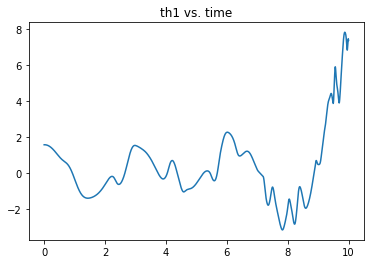

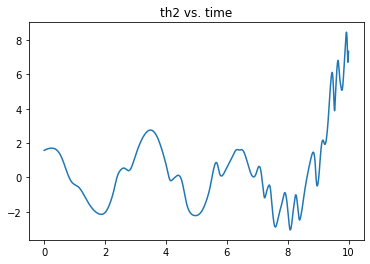

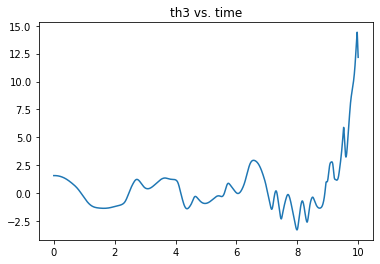

Text(0.5, 1.0, 'th4 vs. time')

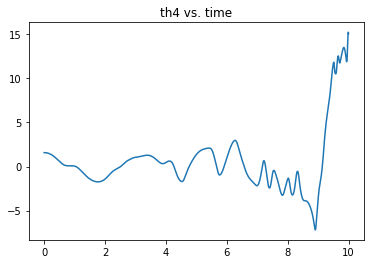

In [9]:
# Plot all theta values over time:
plt.plot(time, th1_vec)
plt.title("th1 vs. time")
plt.show()
plt.plot(time, th2_vec)
plt.title("th2 vs. time")
plt.show()
plt.plot(time, th3_vec)
plt.title("th3 vs. time")
plt.show()
plt.plot(time, th4_vec)
plt.title("th4 vs. time")

In [5]:
# from IPython.core.display import display, HTML
# import matplotlib.animation as animation

# # create an animation of the pendulum swining with Matplotlib
# def pend_pos1(tht1):
#   return x1.subs({l1:l1p, theta1:tht1}), y1.subs({l1:l1p, theta1:tht1})
# def pend_pos2(tht1, tht2):
#   return x2.subs({l1:l1p, theta1:tht1, l2:l2p, theta2:tht2}), y2.subs({l1:l1p, theta1:tht1, l2:l2p, theta2:tht2})
# # create figure
# fig = plt.figure()
# ax = fig.add_subplot(aspect='equal')
# ax.set_xlim(-l_1-l_2-l_3, l_1+l_2+l_3)
# ax.set_ylim(-l_1-l_2-l_3, l_1+l_2+l_3)
# ax.grid()

# # print(len(x1))
# line1, = ax.plot([], [], lw=2, c='w')
# line2, = ax.plot([], [], lw=2, c='w')
# line3, = ax.plot([], [], lw=2, c='w')

# circle1 = ax.add_patch(plt.Circle((0,0), 0.1, fc='b', zorder=3))
# circle2 = ax.add_patch(plt.Circle((0,0), 0.1, fc='r', zorder=3))
# circle3 = ax.add_patch(plt.Circle((0,0), 0.1, fc='r', zorder=3))


# # animate each frame "i"
# def animate(i):
#     line1.set_data([0, x1_vec[i]], [0, y1_vec[i]])
#     line2.set_data([x1_vec[i], x2_vec[i]], [y1_vec[i], y2_vec[i]])
#     line3.set_data([x2_vec[i], x3_vec[i]], [y2_vec[i], y3_vec[i]])
#     circle1.set_center((x1_vec[i], y1_vec[i]))
#     circle2.set_center((x2_vec[i], y2_vec[i]))
#     circle3.set_center((x3_vec[i], y3_vec[i]))

# # save a video: 30 fps
# ani = animation.FuncAnimation(fig, animate, frames=sim_length, interval = dt*1000.0)
# # ffmpeg_writer = animation.FFMpegWriter(fps=fp)
# myvid = ani.to_html5_video()


# display(HTML(myvid))
# # ani.save('pend.mp4', writer=ffmpeg_writer)

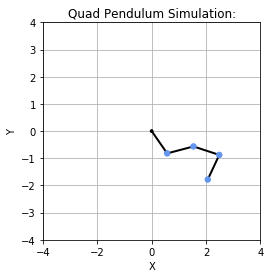

In [10]:

# Create Animation:
# Setup Figure: Initialize Figure / Axe Handles
lb, ub = -5, 5
fig = plt.figure()
ax = fig.add_subplot(aspect='equal')
ax.set_xlim(-l_1-l_2-l_3-l_4, l_1+l_2+l_3+l_4)
ax.set_ylim(-l_1-l_2-l_3-l_4, l_1+l_2+l_3+l_4)
ax.grid()
ax.set_xlabel('X')  # X Label
ax.set_ylabel('Y')  # Y Label
ax.set_title('Quad Pendulum Simulation:')
video_title = "simulation"

# Setup Animation Writer:
FPS = 20
sample_rate = int(1 / (dt * FPS))
dpi = 300
writerObj = FFMpegWriter(fps=FPS)

# Initialize Patch: Pendulum 1 and 2
pendulum_1 = Circle((0, 0), radius=0.1, color='cornflowerblue', zorder=10)
pendulum_2 = Circle((0, 0), radius=0.1, color='cornflowerblue', zorder=10)
pendulum_3 = Circle((0, 0), radius=0.1, color='cornflowerblue', zorder=10)
pendulum_4 = Circle((0, 0), radius=0.1, color='cornflowerblue', zorder=10)

ax.add_patch(pendulum_1)
ax.add_patch(pendulum_2)
ax.add_patch(pendulum_3)
ax.add_patch(pendulum_4)

p1, = ax.plot([], [], color='black', linewidth=2)
p2, = ax.plot([], [], color='black', linewidth=2)
p3, = ax.plot([], [], color='black', linewidth=2)
p4, = ax.plot([], [], color='black', linewidth=2)

# Draw Static Objects:
pin_joint = Circle((0, 0), radius=0.05, color='black', zorder=10)
ax.add_patch(pin_joint)

# Plot and Create Animation:
with writerObj.saving(fig, video_title+".mp4", dpi):
    for i in range(0, sim_length, sample_rate):
        # Draw Pendulum Arm:
        x_pendulum_arm_1 = [0, x1_vec[i]]
        y_pendulum_arm_1 = [0, y1_vec[i]]
        
        x_pendulum_arm_2 = [x1_vec[i], x2_vec[i]]
        y_pendulum_arm_2 = [y1_vec[i], y2_vec[i]]
        
        x_pendulum_arm_3 = [x2_vec[i], x3_vec[i]]
        y_pendulum_arm_3 = [y2_vec[i], y3_vec[i]]
        
        x_pendulum_arm_4 = [x3_vec[i], x4_vec[i]]
        y_pendulum_arm_4 = [y3_vec[i], y4_vec[i]]
        
        p1.set_data(x_pendulum_arm_1, y_pendulum_arm_1)
        p2.set_data(x_pendulum_arm_2, y_pendulum_arm_2)
        p3.set_data(x_pendulum_arm_3, y_pendulum_arm_3)
        p4.set_data(x_pendulum_arm_4, y_pendulum_arm_4)
        
        # Update Pendulum Patches:
        pendulum_1_center = x1_vec[i], y1_vec[i]
        pendulum_2_center = x2_vec[i], y2_vec[i]
        pendulum_3_center = x3_vec[i], y3_vec[i]
        pendulum_4_center = x4_vec[i], y4_vec[i]

        pendulum_1.center = pendulum_1_center
        pendulum_2.center = pendulum_2_center
        pendulum_3.center = pendulum_3_center
        pendulum_4.center = pendulum_4_center
        
        # Update Drawing:
        fig.canvas.draw()
        # Grab and Save Frame:
        writerObj.grab_frame()
from IPython.display import Video
# myvid = ani.to_html5_video()

# display(HTML(myvid))
# Video("/work/"+video_title+".mp4", embed=True, width=640, height=640)